In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
dataset = pd.read_csv("/content/drive/MyDrive/car.data")

Mounted at /content/drive


In [ ]:
dataset

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
data= pd.DataFrame(dataset, columns = dataset.columns)

In [ ]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
data.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [ ]:
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [ ]:
#숫자로 바꾸기

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
  data[i]=le.fit_transform(data[i])

In [ ]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


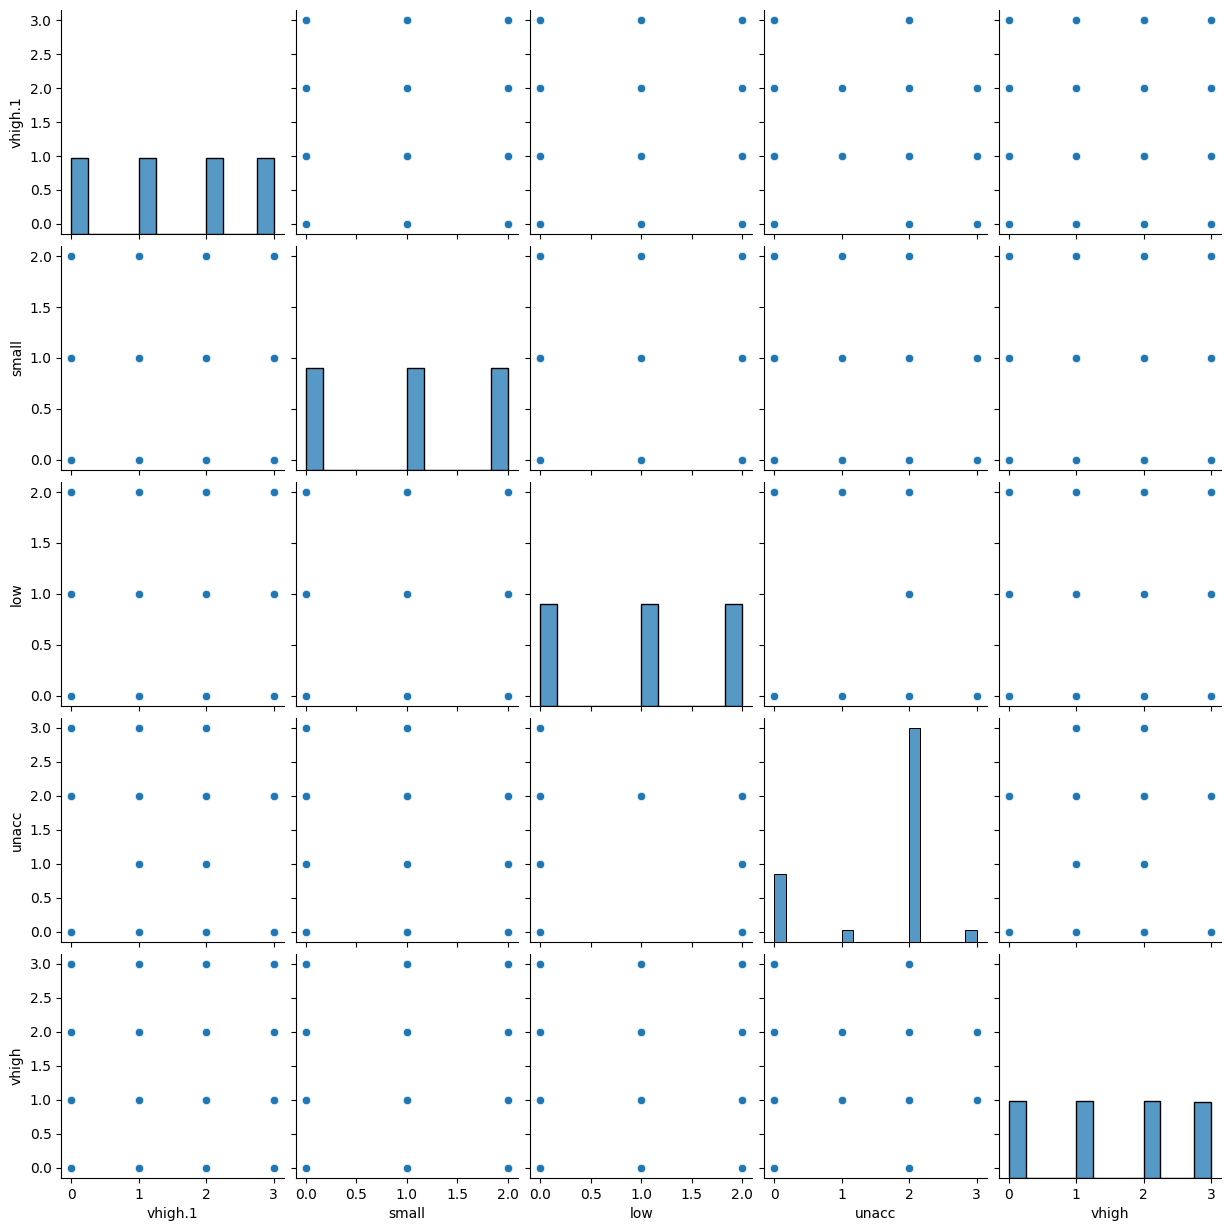

In [ ]:
import seaborn as sns

sns.pairplot(data,
             vars=['vhigh.1', 'small', 'low', 'unacc', 'vhigh'])
plt.show()

In [ ]:
#Splitting the data into training and test test
X = data.iloc[:,0:5].values
y = data.iloc[:,6].values
#추출

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
y_train

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [ ]:
X

array([[3, 3, 0, 0, 2],
       [3, 3, 0, 0, 2],
       [3, 3, 0, 0, 1],
       ...,
       [1, 1, 3, 2, 0],
       [1, 1, 3, 2, 0],
       [1, 1, 3, 2, 0]])

In [ ]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [ ]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(5,),activation='ReLU'))
model.add(Dense(9,activation='tanh'))
model.add(Dense(8,activation='ReLU'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                60        
                                                                 
 dense_25 (Dense)            (None, 9)                 99        
                                                                 
 dense_26 (Dense)            (None, 8)                 80        
                                                                 
 dense_27 (Dense)            (None, 4)                 36        
                                                                 
Total params: 275
Trainable params: 275
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 1s 11ms/step - loss: 0.8438 - accuracy: 0.6720 - val_loss: 0.8342 - val_accuracy: 0.6908
Epoch 2/100
44/44 [==============================] - 0s 6ms/step - loss: 0.7076 - accuracy: 0.6959 - val_loss: 0.7215 - val_accuracy: 0.6908
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 0.6769 - accuracy: 0.6995 - val_loss: 0.7073 - val_accuracy: 0.6936
Epoch 4/100
44/44 [==============================] - 0s 6ms/step - loss: 0.6707 - accuracy: 0.6930 - val_loss: 0.6818 - val_accuracy: 0.6908
Epoch 5/100
44/44 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6951 - val_loss: 0.6653 - val_accuracy: 0.6908
Epoch 6/100
44/44 [==============================] - 0s 6ms/step - loss: 0.6300 - accuracy: 0.7024 - val_loss: 0.6724 - val_accuracy: 0.6965
Epoch 7/100
44/44 [==============================] - 0s 5ms/step - loss: 0.6292 - accuracy: 0.6959 - val_loss: 0.6673 - val_accuracy: 0.6908
Epoch 8/100


In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.00      0.00      0.00        14
           2       0.69      1.00      0.82       239
           3       0.00      0.00      0.00        16

    accuracy                           0.69       346
   macro avg       0.17      0.25      0.20       346
weighted avg       0.48      0.69      0.56       346

[[  0   0  77   0]
 [  0   0  14   0]
 [  0   0 239   0]
 [  0   0  16   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


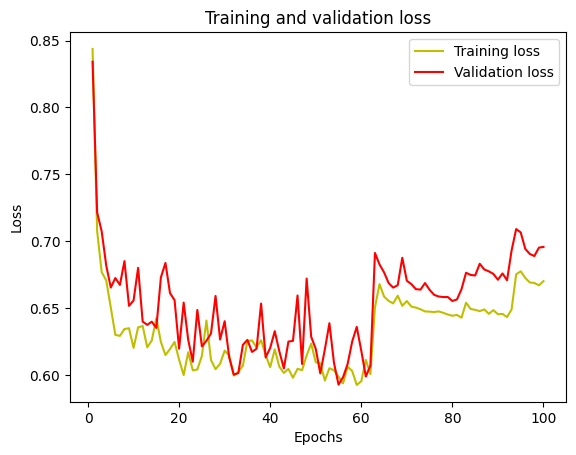

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

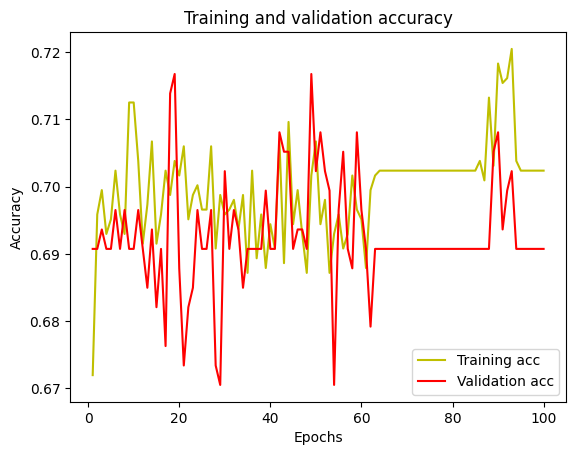

In [ ]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()